# Outlier Deteksi

## Pengertian Outlier Deteksi  
Outlier merupakan data yang memiliki perbedaan mencolok dibandingkan dengan sebagian besar data lain dalam suatu dataset. Outlier bisa muncul akibat kesalahan dalam pengukuran, kesalahan input, atau memang mencerminkan fenomena unik yang berbeda dari pola umum data lainnya. Keberadaan outlier dapat mempengaruhi hasil analisis dan kinerja model machine learning, sehingga deteksi outlier menjadi langkah penting dalam proses eksplorasi data.

## Metode untuk melakukan outlier deteksi
Untuk mendeteksi outlier memiliki 2 metode yaitu:
- K-Nearest Neighbors (KNN)
- Local Outlier Factor (LOF)

## Tahapan melakukan outlier deteksi
1. **Pengumpulan Data** -- Tahap pertama dalam deteksi outlier adalah mengumpulkan data yang akan dianalisis. Data ini bisa berasal dari berbagai sumber, seperti database, sensor, atau log aktivitas. Data yang digunakan harus memiliki fitur yang relevan dengan tujuan analisis agar hasil deteksi outlier lebih akurat. Selain itu, memastikan kelengkapan dan kualitas data sangat penting agar hasil analisis tidak bias atau salah interpretasi.

2. **Pra-Pemrosesan Data** -- Sebelum melakukan deteksi outlier, data harus diproses terlebih dahulu. Tahap ini mencakup pembersihan data dari nilai yang hilang, duplikasi, atau inkonsistensi. Jika data memiliki skala yang berbeda-beda, normalisasi atau standarisasi dapat diterapkan agar setiap fitur memiliki pengaruh yang seimbang. Data yang telah diproses dengan baik akan menghasilkan deteksi outlier yang lebih andal dan akurat.

3. **Memilih metode untuk deteksi outlier** -- Pemilihan metode untuk outlier deteksi tergantung pada karakteristik data. Metode statistik, seperti Z-Score dan Interquartile Range (IQR), cocok untuk data yang mengikuti distribusi normal. Jika distribusi data tidak diketahui, metode berbasis jarak seperti Local Outlier Factor (LOF) atau k-Nearest Neighbors (k-NN) bisa digunakan. Untuk data yang membentuk klaster, metode berbasis klasterisasi seperti DBSCAN dan K-Means dapat diterapkan. Pemilihan metode yang tepat akan meningkatkan efektivitas deteksi anomali.

4. **Hitung skor outlier** -- Setelah memilih metode yang sesuai, langkah selanjutnya adalah menghitung skor outlier untuk setiap titik data. Skor ini menunjukkan seberapa jauh suatu titik menyimpang dari pola umum dalam dataset. Misalnya, dalam metode Z-Score, skor dihitung berdasarkan jarak suatu titik dari rata-rata dalam satuan standar deviasi. Sementara itu, dalam LOF, skor dihitung berdasarkan kepadatan lokal dibandingkan dengan tetangga terdekatnya.

5. **Tentukan ambang batas** -- Agar bisa mengidentifikasi outlier, perlu ditentukan ambang batas (threshold) yang membedakan titik normal dan outlier. Misalnya, dalam metode Z-Score, titik dengan nilai lebih besar dari 3 sering dianggap sebagai outlier. Dalam metode LOF, titik dengan nilai LOF di atas 1.5 atau 2 dapat dikategorikan sebagai anomali. Penentuan ambang batas yang sesuai sangat bergantung pada karakteristik dataset dan kebutuhan analisis.

6. **Analisis dan Interpretasi** -- Agar bisa mengidentifikasi outlier, perlu ditentukan ambang batas (threshold) yang membedakan titik normal dan outlier. Misalnya, dalam metode Z-Score, titik dengan nilai lebih besar dari 3 sering dianggap sebagai outlier. Dalam metode LOF, titik dengan nilai LOF di atas 1.5 atau 2 dapat dikategorikan sebagai anomali. Penentuan ambang batas yang sesuai sangat bergantung pada karakteristik dataset dan kebutuhan analisis.


## Contoh outlier deteksi

In [2]:
%pip install pymysql
%pip install psycopg2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 1.7 MB/s eta 0:00:00


In [3]:
import psycopg2
import pymysql
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from IPython.display import display, HTML

id,class,petal_length,petal_width,sepal_length,sepal_width,distance,outlier
1,Iris-setosa,1.4,0.2,5.1,3.5,5.424942,False
2,Iris-setosa,14.0,2.0,40.9,30.0,46.407542,True
3,Iris-setosa,1.3,0.2,4.7,3.2,5.430470,False
4,Iris-setosa,1.5,0.2,4.6,3.1,5.273519,False
5,Iris-setosa,1.4,0.2,5.0,3.6,5.485435,False
6,Iris-setosa,1.7,0.4,5.4,3.9,5.288667,False
7,Iris-setosa,1.4,0.3,4.6,3.4,5.412947,False
8,Iris-setosa,1.5,0.2,5.0,3.4,5.325411,False
9,Iris-setosa,1.4,0.2,4.4,2.9,5.316014,False
10,Iris-setosa,1.5,0.1,4.9,3.1,5.271622,False


,id,class,petal_length,petal_width,sepal_length,sepal_width,distance,outlier
1,2,Iris-setosa,14.0,2.0,40.9,30.0,46.407542,True


id,class,petal_length,petal_width,sepal_length,sepal_width,distance,outlier
1,Iris-setosa,1.4,0.2,5.1,3.5,5.424942,False
3,Iris-setosa,1.3,0.2,4.7,3.2,5.430470,False
4,Iris-setosa,1.5,0.2,4.6,3.1,5.273519,False
5,Iris-setosa,1.4,0.2,5.0,3.6,5.485435,False
6,Iris-setosa,1.7,0.4,5.4,3.9,5.288667,False
7,Iris-setosa,1.4,0.3,4.6,3.4,5.412947,False
8,Iris-setosa,1.5,0.2,5.0,3.4,5.325411,False
9,Iris-setosa,1.4,0.2,4.4,2.9,5.316014,False
10,Iris-setosa,1.5,0.1,4.9,3.1,5.271622,False
11,Iris-setosa,1.5,0.2,5.4,3.7,5.423099,False


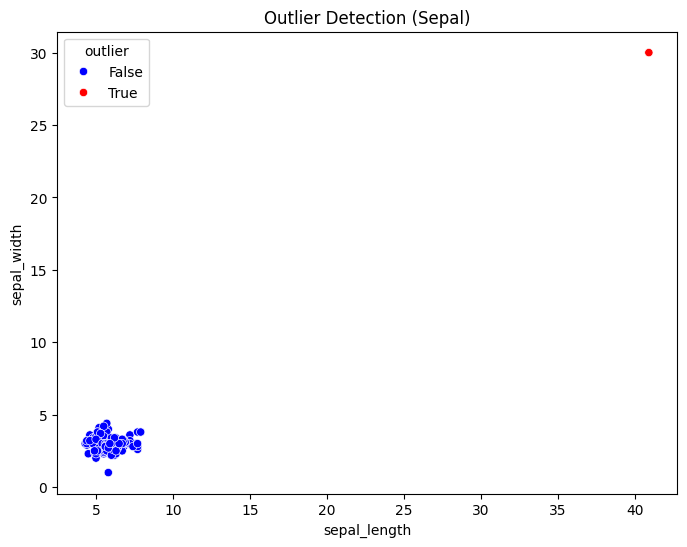

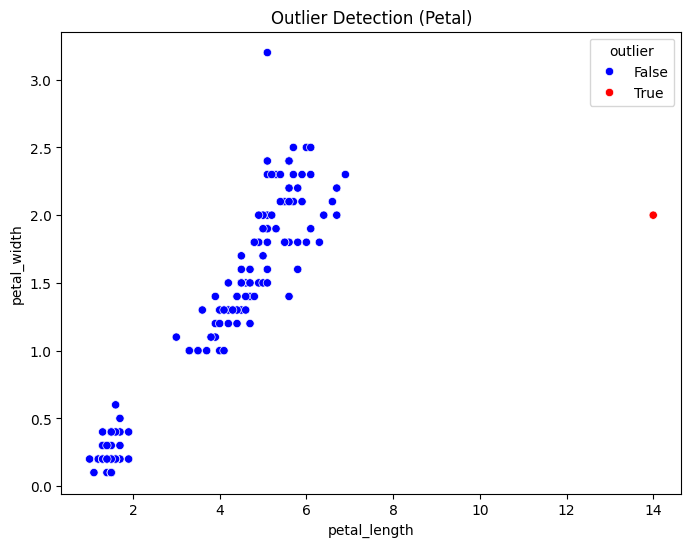

In [5]:
def get_pg_data():
    conn = psycopg2.connect(
        host="postgresqltest-projectadzin.i.aivencloud.com",
        user="avnadmin",
        password="AVNS_k58rpi0pi31N8ucX-vK",
        database="defaultdb",
        port=16209
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM sepal")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

def get_mysql_data():
    conn = pymysql.connect(
        host="mysql-386c0068-projectadzin.l.aivencloud.com",
        user="avnadmin",
        password="AVNS_-Zr6_we8osFXobQb3qi",
        database="iris",
        port=16209
    )
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM petal")
    data = cursor.fetchall()
    columns = [desc[0] for desc in cursor.description]  # Ambil nama kolom
    cursor.close()
    conn.close()

    return pd.DataFrame(data, columns=columns)

# Ambil data dari kedua database
df_postgresql = get_pg_data()
df_mysql = get_mysql_data()

# Gabungkan berdasarkan kolom 'id' dan 'Class'
df_merged = pd.merge(df_mysql, df_postgresql, on=["id", "class"], how="inner")

# Ambil data fitur numerik
feature_columns = ["petal_length", "petal_width", "sepal_length", "sepal_width"]
data_values = df_merged[feature_columns].values

# Ambil referensi dari baris terakhir (baris ke-152 jika dihitung dari 1, atau index -1)
reference_point = data_values[-1]

def compute_distances(data, reference):
    return np.array([euclidean(row, reference) for row in data])

# Hitung jarak Euclidean dari setiap baris ke referensi
df_merged["distance"] = compute_distances(data_values, reference_point)

# Tentukan threshold outlier berdasarkan persentil ke-95 (bisa disesuaikan)
threshold = np.percentile(df_merged["distance"], 99.9)
df_merged["outlier"] = df_merged["distance"] > threshold

# Cetak hasil data dengan outlier
display(HTML(df_merged.to_html(index=False)))

print("\n")

# Hitung total outlier
total_outliers = df_merged["outlier"].sum()
display(HTML(f"Jumlah Outlier: {total_outliers}"))

print("\n")

# Menampilkan data outlier
outlier = df_merged[df_merged['outlier']]
display(HTML("Data Outlier:"))
display(HTML(outlier.to_html()))

print("\n")

#menampilkan data non-outlier
non_outliers = df_merged[df_merged["outlier"] != True]
display(HTML("Data Non-Outlier:"))
display(HTML(non_outliers.to_html(index=False)))

# Visualisasi scatter plot dengan warna berdasarkan outlier
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["sepal_length"], y=df_merged["sepal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)

print("\n")
plt.title("Outlier Detection (Sepal)")
plt.show()

print('\n')
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df_merged["petal_length"], y=df_merged["petal_width"],
    hue=df_merged["outlier"], palette={False: "blue", True: "red"}
)
plt.title("Outlier Detection (Petal)")
plt.show()
